In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('ipl_2024_deliveries.csv')

In [3]:
df.head()

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,...,byes,noballs,team_runs,bowler_runs,wicket_type,player_dismissed,ball_count,bat_ball_count,wicket_count,bowler_wicket_count
0,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,...,0,0,1,1,NaN,NaN,0,0,0,0
1,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,...,0,0,1,1,NaN,NaN,1,1,0,0
2,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.2,du Plessis,...,0,0,0,0,NaN,NaN,1,1,0,0
3,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.3,du Plessis,...,0,0,0,0,NaN,NaN,1,1,0,0
4,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.4,du Plessis,...,0,0,0,0,NaN,NaN,1,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17103 entries, 0 to 17102
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             17103 non-null  int64  
 1   season               17103 non-null  int64  
 2   match_no             17103 non-null  int64  
 3   date                 17103 non-null  object 
 4   venue                17103 non-null  object 
 5   batting_team         17103 non-null  object 
 6   bowling_team         17103 non-null  object 
 7   innings              17103 non-null  int64  
 8   over                 17103 non-null  float64
 9   striker              17103 non-null  object 
 10  bowler               17103 non-null  object 
 11  runs_of_bat          17103 non-null  int64  
 12  extras               17103 non-null  int64  
 13  wide                 17103 non-null  int64  
 14  legbyes              17103 non-null  int64  
 15  byes                 17103 non-null 

# Team Analysis

# IPL 2024 Batting Performance

In [5]:
batting_team_performance = df.groupby(['match_id', 'batting_team']).agg(
    total_runs=('team_runs', 'sum'),
    wickets_lost=('wicket_count','sum'),
    ball_count=('ball_count','sum')
).reset_index()

In [6]:
# batting_team_performance[team_performance['batting_team'] == 'RCB']

In [7]:
batting_team_performance['run_rate'] = np.where(
    batting_team_performance['wickets_lost'] != 10,
    round(batting_team_performance['total_runs']/round(batting_team_performance['ball_count']/6,2),2),
    round(batting_team_performance['total_runs'] / 20, 2)
)

In [8]:
batting_team_performance.head()

,match_id,batting_team,total_runs,wickets_lost,ball_count,run_rate
0,202401,CSK,176,4,112,9.43
1,202401,RCB,173,6,120,8.65
2,202402,DC,174,9,120,8.70
3,202402,PBKS,177,6,116,9.16
4,202403,KKR,208,7,120,10.40


In [9]:
average_run_rate = batting_team_performance.groupby('batting_team')['run_rate'].mean().round(2).reset_index()

In [10]:
average_run_rate

,batting_team,run_rate
0,CSK,9.17
1,DC,9.67
2,GT,8.56
3,KKR,10.70
4,LSG,8.94
5,MI,9.60
6,PBKS,9.08
7,RCB,10.19
8,RR,9.09
9,SRH,10.18


In [11]:
average_batting_team_performance = average_run_rate.sort_values(by='run_rate', ascending=False).reset_index()

In [12]:
average_batting_team_performance

,index,batting_team,run_rate
0,3,KKR,10.70
1,7,RCB,10.19
2,9,SRH,10.18
3,1,DC,9.67
4,5,MI,9.60
5,0,CSK,9.17
6,8,RR,9.09
7,6,PBKS,9.08
8,4,LSG,8.94
9,2,GT,8.56


In [13]:
team_palette = {
    'KKR': 'purple',
    'SRH': '#ff8c00',
    'RR': '#fc0fc0',
    'RCB': '#ff0000',
    'CSK': '#ffff00',
    'PBKS': '#dc143c',
    'LSG': 'darkblue',
    'DC':'#87ceeb',
    'GT':'black',
    'MI':'#0000ff'
 }

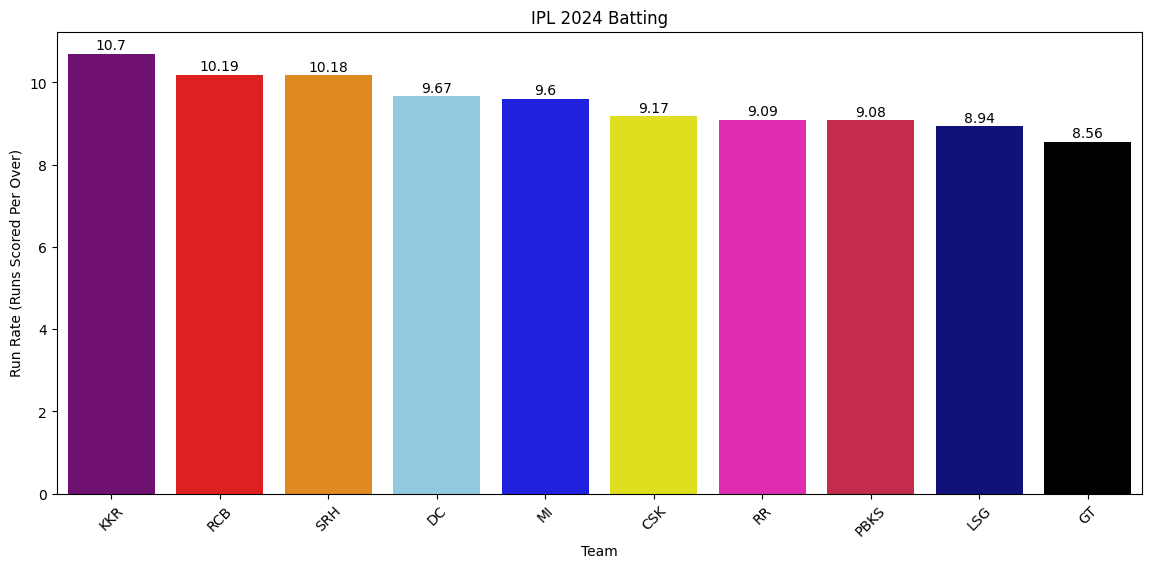

In [14]:
plt.figure(figsize=(14, 6))
sb.barplot(x='batting_team', y='run_rate', data=average_batting_team_performance, palette=team_palette)


plt.xlabel('Team')
plt.ylabel('Run Rate (Runs Scored Per Over)')
plt.title('IPL 2024 Batting')
plt.xticks(rotation=45)  

for index, row in average_batting_team_performance.iterrows():
    plt.text(index, row['run_rate'] + 0.10,  
             row['run_rate'],      
             ha='center', color='black')

plt.show()



# IPL 2024 Bowling Performance

In [15]:
bowling_team_performance = df.groupby(['match_id', 'bowling_team']).agg(
    total_runs=('team_runs', 'sum'),
    wickets_lost=('wicket_count','sum'),
    ball_count=('ball_count','sum')
).reset_index()

In [16]:
bowling_team_performance['run_rate'] = np.where(
    bowling_team_performance['wickets_lost'] != 10,
    round(bowling_team_performance['total_runs']/round(bowling_team_performance['ball_count']/6,2),2),
    round(bowling_team_performance['total_runs'] / 20, 2)
)

In [17]:
average_run_rate = bowling_team_performance.groupby('bowling_team')['run_rate'].mean().round(2).reset_index()

In [18]:
average_bowling_team_performance = average_run_rate.sort_values(by='run_rate', ascending=True).reset_index()

In [19]:
average_bowling_team_performance

,index,bowling_team,run_rate
0,0,CSK,8.81
1,3,KKR,8.85
2,8,RR,8.93
3,6,PBKS,9.41
4,2,GT,9.76
5,7,RCB,9.80
6,5,MI,9.84
7,4,LSG,9.90
8,1,DC,10.01
9,9,SRH,10.09


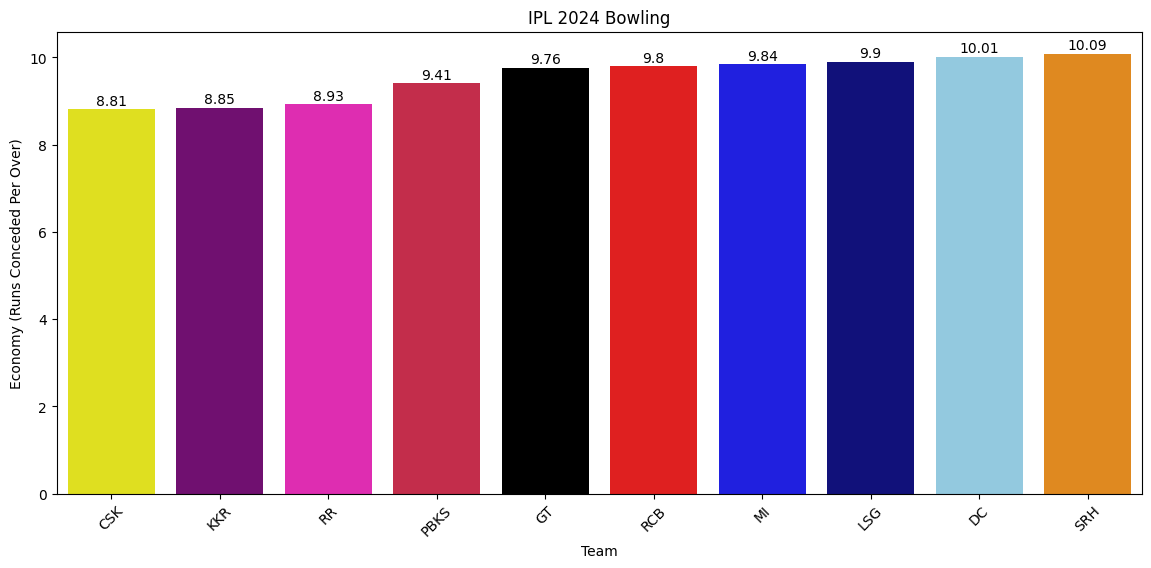

In [20]:
plt.figure(figsize=(14, 6))
sb.barplot(x='bowling_team', y='run_rate', data=average_bowling_team_performance, palette=team_palette)


plt.xlabel('Team')
plt.ylabel('Economy (Runs Conceded Per Over)')
plt.title('IPL 2024 Bowling')
plt.xticks(rotation=45)  

for index, row in average_bowling_team_performance.iterrows():
    plt.text(index, row['run_rate'] + 0.10,  
             row['run_rate'],      
             ha='center', color='black')

plt.show()

# IPL 2024 Powerplay Run Rate (1-6)

In [21]:
powerplay_data = df[df['over'].between(0, 6)]

In [22]:
powerplay_data

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,...,byes,noballs,team_runs,bowler_runs,wicket_type,player_dismissed,ball_count,bat_ball_count,wicket_count,bowler_wicket_count
0,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,...,0,0,1,1,NaN,NaN,0,0,0,0
1,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.1,Kohli,...,0,0,1,1,NaN,NaN,1,1,0,0
2,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.2,du Plessis,...,0,0,0,0,NaN,NaN,1,1,0,0
3,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.3,du Plessis,...,0,0,0,0,NaN,NaN,1,1,0,0
4,202401,2024,1,"Mar 22, 2024","MA Chidambaram Stadium, Chennai",RCB,CSK,1,0.4,du Plessis,...,0,0,0,0,NaN,NaN,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17071,202474,2024,74,"May 26, 2024","MA Chidambaram Stadium, Chennai",KKR,SRH,2,5.2,Venkatesh Iyer,...,0,0,4,4,NaN,NaN,1,1,0,0
17072,202474,2024,74,"May 26, 2024","MA Chidambaram Stadium, Chennai",KKR,SRH,2,5.3,Venkatesh Iyer,...,0,0,6,6,NaN,NaN,1,1,0,0
17073,202474,2024,74,"May 26, 2024","MA Chidambaram Stadium, Chennai",KKR,SRH,2,5.4,Venkatesh Iyer,...,0,0,4,4,NaN,NaN,1,1,0,0
17074,202474,2024,74,"May 26, 2024","MA Chidambaram Stadium, Chennai",KKR,SRH,2,5.5,Venkatesh Iyer,...,0,0,1,1,NaN,NaN,1,1,0,0


In [23]:
powerplay_team_stats = powerplay_data.groupby(['match_id', 'batting_team']).agg(
    total_runs=('team_runs', 'sum'),   
    total_balls=('ball_count', 'sum'),
    total_wickets=('wicket_count','sum')
).reset_index()

In [24]:
powerplay_team_stats

,match_id,batting_team,total_runs,total_balls,total_wickets
0,202401,CSK,62,36,1
1,202401,RCB,42,36,3
2,202402,DC,54,36,1
3,202402,PBKS,60,36,2
4,202403,KKR,43,36,3
...,...,...,...,...,...
137,202472,RR,47,36,1
138,202473,RR,51,36,1
139,202473,SRH,68,36,3
140,202474,KKR,72,36,1


In [25]:
powerplay_team_stats = powerplay_team_stats.groupby(['batting_team']).agg(
    total_runs=('total_runs', 'sum'),   
    total_balls=('total_balls', 'sum'),
    total_wickets=('total_wickets','sum')
).reset_index()

In [26]:
powerplay_team_stats['run_rate'] = round(powerplay_team_stats['total_runs']/round(powerplay_team_stats['total_balls']/6,2),2)

In [27]:
powerplay_team_stats['balls_per_wickets_lost'] = round(powerplay_team_stats['total_balls']/powerplay_team_stats['total_wickets'],2)

In [28]:
powerplay_team_stats.sort_values(by='run_rate', ascending=False).reset_index()

,index,batting_team,total_runs,total_balls,total_wickets,run_rate,balls_per_wickets_lost
0,9,SRH,1073,576,29,11.18,19.86
1,3,KKR,930,504,21,11.07,24.00
2,1,DC,897,504,28,10.68,18.00
3,7,RCB,876,540,21,9.73,25.71
4,5,MI,789,504,25,9.39,20.16
5,6,PBKS,743,504,23,8.85,21.91
6,0,CSK,733,504,19,8.73,26.53
7,8,RR,773,540,19,8.59,28.42
8,4,LSG,695,504,26,8.27,19.38
9,2,GT,556,432,16,7.72,27.00


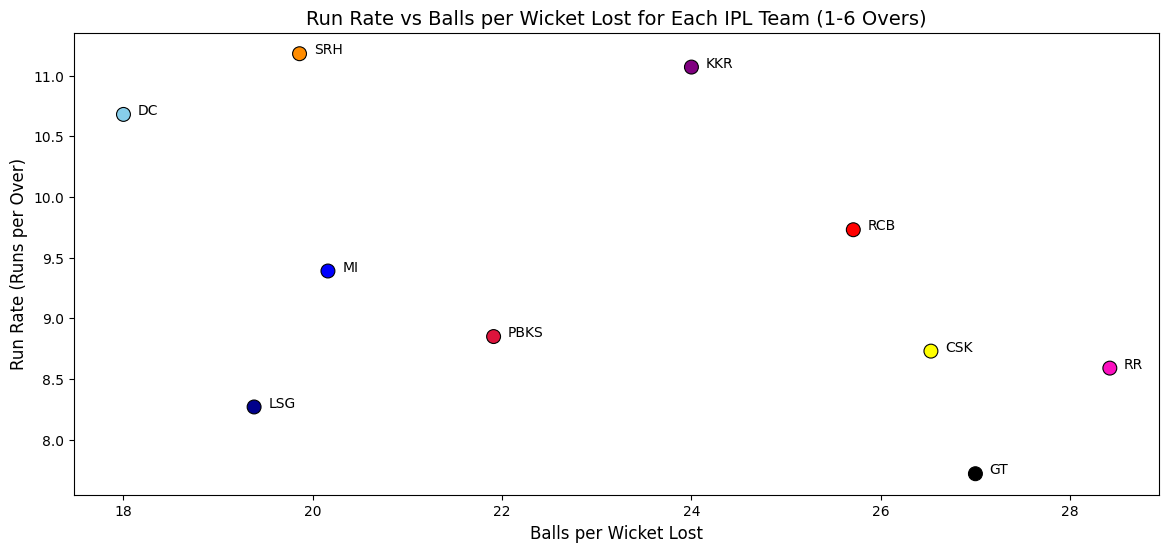

In [29]:
plt.figure(figsize=(14, 6))
scatter_plot = sb.scatterplot(
    data=powerplay_team_stats,
    x='balls_per_wickets_lost',
    y='run_rate',
    hue='batting_team',
    palette=team_palette,
    s=100,
    edgecolor='black',
    legend = False
)

for i in range(len(powerplay_team_stats)):
    plt.text(
        powerplay_team_stats['balls_per_wickets_lost'][i] + 0.15,
        powerplay_team_stats['run_rate'][i],
        powerplay_team_stats['batting_team'][i],
        fontsize=10
    )

plt.title('Run Rate vs Balls per Wicket Lost for Each IPL Team (1-6 Overs)', fontsize=14)
plt.xlabel('Balls per Wicket Lost', fontsize=12)
plt.ylabel('Run Rate (Runs per Over)', fontsize=12)

plt.show()

# IPL 2024 Middle Overs Run Rate (7-15)

In [30]:
middle_overs_data = df[df['over'].between(6, 15)]

In [31]:
middleover_team_stats = middle_overs_data.groupby(['match_id', 'batting_team']).agg(
    total_runs=('team_runs', 'sum'),  
    total_balls=('ball_count', 'sum'),
    total_wickets=('wicket_count','sum')
).reset_index()

In [32]:
middleover_team_stats = middleover_team_stats.groupby(['batting_team']).agg(
    total_runs=('total_runs', 'sum'),  
    total_balls=('total_balls', 'sum'),
    total_wickets=('total_wickets','sum')
).reset_index()

In [33]:
middleover_team_stats['run_rate'] = round(middleover_team_stats['total_runs']/round(middleover_team_stats['total_balls']/6,2),2)

In [34]:
middleover_team_stats['balls_per_wickets_lost'] = round(middleover_team_stats['total_balls']/middleover_team_stats['total_wickets'],2)

In [35]:
middleover_team_stats.sort_values(by='run_rate', ascending=False).reset_index()

,index,batting_team,total_runs,total_balls,total_wickets,run_rate,balls_per_wickets_lost
0,3,KKR,1175,721,28,9.78,25.75
1,7,RCB,1238,802,40,9.26,20.05
2,9,SRH,1245,832,43,8.98,19.35
3,5,MI,1131,758,35,8.95,21.66
4,4,LSG,1120,756,34,8.89,22.24
5,1,DC,1035,719,37,8.64,19.43
6,8,RR,1155,810,34,8.56,23.82
7,6,PBKS,1071,756,41,8.50,18.44
8,2,GT,903,648,33,8.36,19.64
9,0,CSK,1049,756,34,8.33,22.24


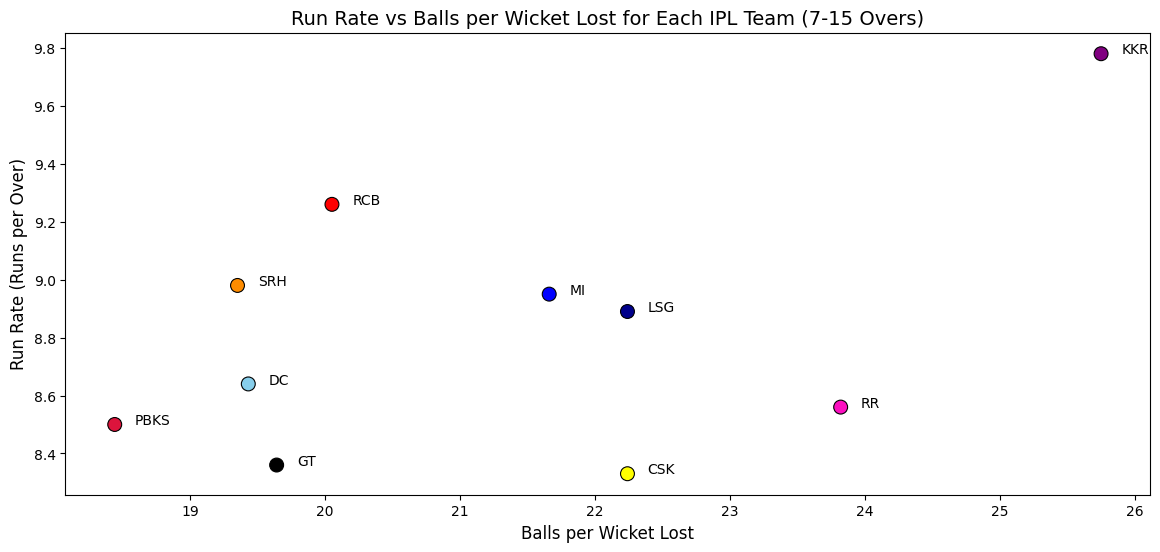

In [36]:
plt.figure(figsize=(14, 6))
scatter_plot = sb.scatterplot(
    data=middleover_team_stats,
    x='balls_per_wickets_lost',
    y='run_rate',
    hue='batting_team', 
    palette=team_palette,
    s=100,  
    edgecolor='black',
    legend = False
)


for i in range(len(middleover_team_stats)):
    plt.text(
        middleover_team_stats['balls_per_wickets_lost'][i] + 0.15, 
        middleover_team_stats['run_rate'][i],
        middleover_team_stats['batting_team'][i],
        fontsize=10
    )

plt.title('Run Rate vs Balls per Wicket Lost for Each IPL Team (7-15 Overs)', fontsize=14)
plt.xlabel('Balls per Wicket Lost', fontsize=12)
plt.ylabel('Run Rate (Runs per Over)', fontsize=12)


plt.show()

# IPL 2024 Death Overs (16-20)

In [37]:
death_overs_data = df[df['over'].between(15,20)]

In [38]:
deathover_team_stats = death_overs_data.groupby(['match_id', 'batting_team']).agg(
    total_runs=('team_runs', 'sum'),   
    total_balls=('ball_count', 'sum'),
    total_wickets=('wicket_count','sum')
).reset_index()

In [39]:
deathover_team_stats = deathover_team_stats.groupby(['batting_team']).agg(
    total_runs=('total_runs', 'sum'),   
    total_balls=('total_balls', 'sum'),
    total_wickets=('total_wickets','sum')
).reset_index()

In [40]:
deathover_team_stats['run_rate'] = round(deathover_team_stats['total_runs']/round(deathover_team_stats['total_balls']/6,2),2)

In [41]:
deathover_team_stats['balls_per_wickets_lost'] = round(deathover_team_stats['total_balls']/deathover_team_stats['total_wickets'],2)

In [42]:
deathover_team_stats.sort_values(by='run_rate', ascending=False).reset_index()

,index,batting_team,total_runs,total_balls,total_wickets,run_rate,balls_per_wickets_lost
0,7,RCB,816,390,38,12.55,10.26
1,3,KKR,562,270,27,12.49,10.00
2,0,CSK,742,388,24,11.47,16.17
3,5,MI,648,346,36,11.24,9.61
4,6,PBKS,673,364,28,11.09,13.00
5,1,DC,641,353,29,10.90,12.17
6,8,RR,719,397,28,10.87,14.18
7,2,GT,581,325,30,10.73,10.83
8,9,SRH,734,415,33,10.61,12.58
9,4,LSG,668,384,24,10.44,16.00


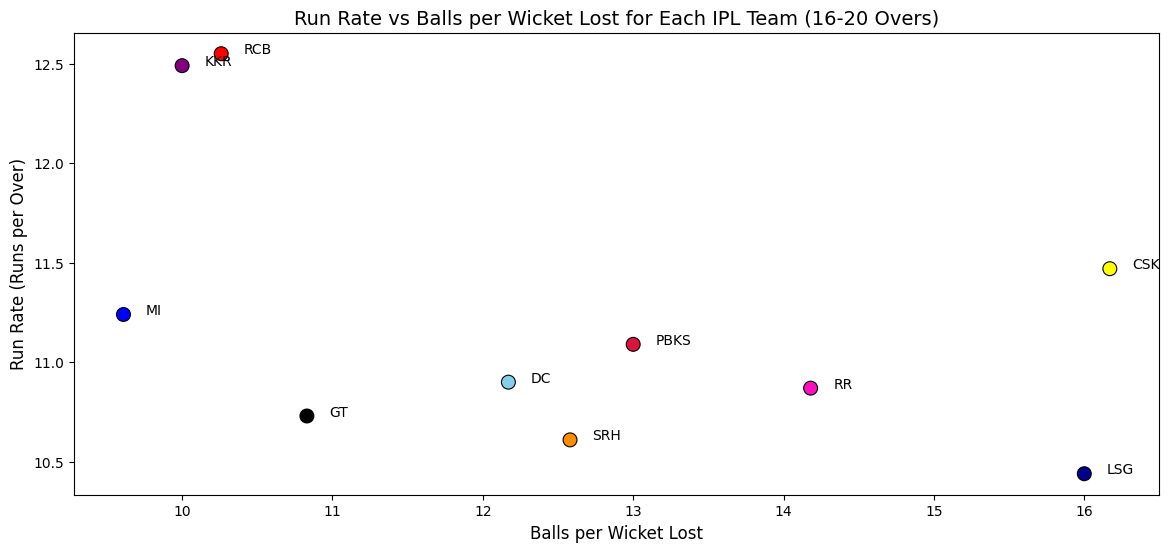

In [43]:
plt.figure(figsize=(14, 6))
scatter_plot = sb.scatterplot(
    data=deathover_team_stats,
    x='balls_per_wickets_lost',
    y='run_rate',
    hue='batting_team', 
    palette=team_palette,
    s=100, 
    edgecolor='black',
    legend = False
)

for i in range(len(deathover_team_stats)):
    plt.text(
        deathover_team_stats['balls_per_wickets_lost'][i] + 0.15, 
        deathover_team_stats['run_rate'][i],
        deathover_team_stats['batting_team'][i],
        fontsize=10
    )


plt.title('Run Rate vs Balls per Wicket Lost for Each IPL Team (16-20 Overs)', fontsize=14)
plt.xlabel('Balls per Wicket Lost', fontsize=12)
plt.ylabel('Run Rate (Runs per Over)', fontsize=12)


plt.show()

# IPL 2024 Bowling Powerplay (1-6)

In [44]:
powerplay_data = df[df['over'].between(0, 6)]

In [45]:
powerplay_team_stats = powerplay_data.groupby(['match_id', 'bowling_team']).agg(
    total_runs=('team_runs', 'sum'),  
    total_balls=('ball_count', 'sum'),
    total_wickets=('wicket_count','sum')
).reset_index()

In [46]:
powerplay_team_stats = powerplay_team_stats.groupby(['bowling_team']).agg(
    total_runs=('total_runs', 'sum'),  
    total_balls=('total_balls', 'sum'),
    total_wickets=('total_wickets','sum')
).reset_index()

In [47]:
powerplay_team_stats['economy_rate'] = round(powerplay_team_stats['total_runs']/round(powerplay_team_stats['total_balls']/6,2),2)

In [48]:
powerplay_team_stats['strike_rate'] = round(powerplay_team_stats['total_balls']/powerplay_team_stats['total_wickets'],2)

In [49]:
powerplay_team_stats.sort_values(by='economy_rate', ascending=True).reset_index()

,index,bowling_team,total_runs,total_balls,total_wickets,economy_rate,strike_rate
0,8,RR,762,540,28,8.47,19.29
1,0,CSK,737,504,15,8.77,33.60
2,6,PBKS,760,504,17,9.05,29.65
3,5,MI,771,504,23,9.18,21.91
4,9,SRH,910,576,24,9.48,24.00
5,2,GT,686,432,23,9.53,18.78
6,7,RCB,879,540,24,9.77,22.50
7,4,LSG,828,504,20,9.86,25.20
8,3,KKR,836,504,28,9.95,18.00
9,1,DC,896,504,25,10.67,20.16


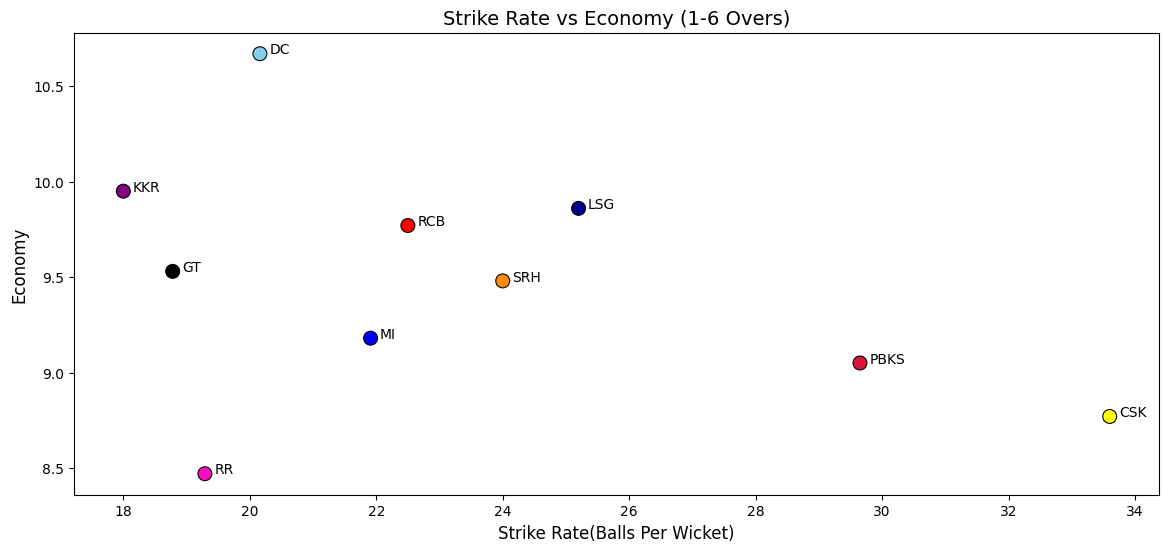

In [50]:
plt.figure(figsize=(14, 6))
scatter_plot = sb.scatterplot(
    data=powerplay_team_stats,
    x='strike_rate',
    y='economy_rate',
    hue='bowling_team', 
    palette=team_palette,
    s=100, 
    edgecolor='black',
    legend = False
)

for i in range(len(powerplay_team_stats)):
    plt.text(
        powerplay_team_stats['strike_rate'][i] + 0.15,  
        powerplay_team_stats['economy_rate'][i],
        powerplay_team_stats['bowling_team'][i],
        fontsize=10
    )

plt.title('Strike Rate vs Economy (1-6 Overs)', fontsize=14)
plt.xlabel('Strike Rate(Balls Per Wicket)', fontsize=12)
plt.ylabel('Economy', fontsize=12)

plt.show()

# IPL 2024 Bowling Middle Overs (7-15)

In [51]:
middle_overs_data = df[df['over'].between(6, 15)]

In [52]:
middleover_team_stats = middle_overs_data.groupby(['match_id', 'bowling_team']).agg(
    total_runs=('team_runs', 'sum'),   
    total_balls=('ball_count', 'sum'),
    total_wickets=('wicket_count','sum')
).reset_index()

In [53]:
middleover_team_stats = middleover_team_stats.groupby(['bowling_team']).agg(
    total_runs=('total_runs', 'sum'),  
    total_balls=('total_balls', 'sum'),
    total_wickets=('total_wickets','sum')
).reset_index()

In [54]:
middleover_team_stats['economy'] = round(middleover_team_stats['total_runs']/round(middleover_team_stats['total_balls']/6,2),2)

In [55]:
middleover_team_stats['strike_rate'] = round(middleover_team_stats['total_balls']/middleover_team_stats['total_wickets'],2)

In [56]:
middleover_team_stats.sort_values(by='economy', ascending=True).reset_index()

,index,bowling_team,total_runs,total_balls,total_wickets,economy,strike_rate
0,0,CSK,1007,756,35,7.99,21.60
1,3,KKR,1045,758,51,8.27,14.86
2,8,RR,1138,810,35,8.43,23.14
3,4,LSG,1028,724,30,8.52,24.13
4,1,DC,1078,756,41,8.56,18.44
5,6,PBKS,1083,756,36,8.60,21.00
6,2,GT,891,603,24,8.87,25.12
7,7,RCB,1287,810,40,9.53,20.25
8,9,SRH,1324,829,37,9.58,22.41
9,5,MI,1241,756,30,9.85,25.20


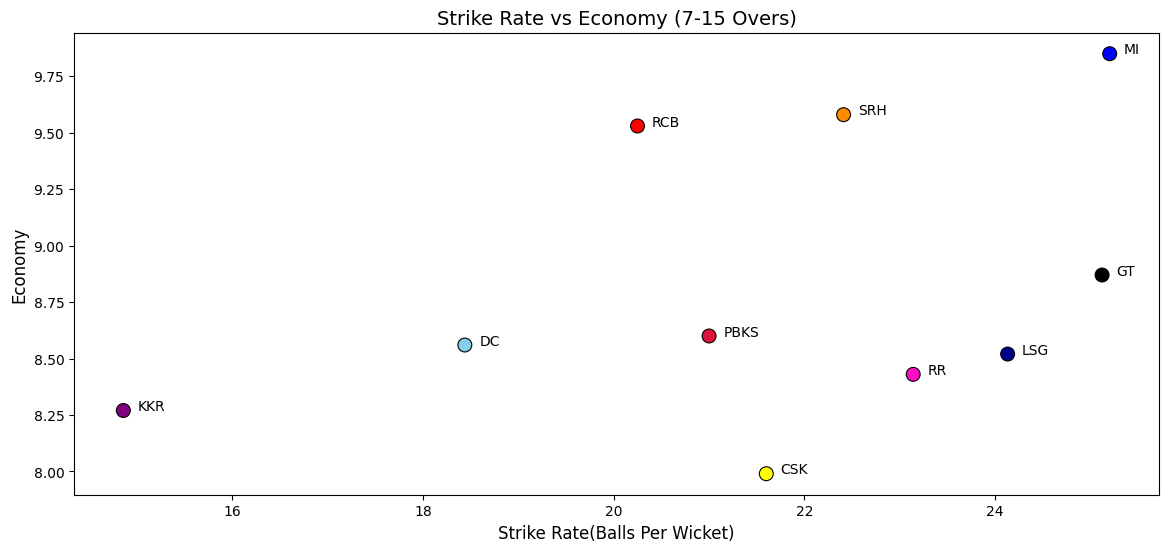

In [57]:
plt.figure(figsize=(14, 6))
scatter_plot = sb.scatterplot(
    data=middleover_team_stats,
    x='strike_rate',
    y='economy',
    hue='bowling_team', 
    palette=team_palette,
    s=100, 
    edgecolor='black',
    legend = False
)

for i in range(len(middleover_team_stats)):
    plt.text(
        middleover_team_stats['strike_rate'][i] + 0.15, 
        middleover_team_stats['economy'][i],
        middleover_team_stats['bowling_team'][i],
        fontsize=10
    )

plt.title('Strike Rate vs Economy (7-15 Overs)', fontsize=14)
plt.xlabel('Strike Rate(Balls Per Wicket)', fontsize=12)
plt.ylabel('Economy', fontsize=12)


plt.show()

# IPL 2024 Bowling Death Overs (16-20)

In [58]:
death_overs_data = df[df['over'].between(15,20)]

In [59]:
deathover_team_stats = death_overs_data.groupby(['match_id', 'bowling_team']).agg(
    total_runs=('team_runs', 'sum'),  
    total_balls=('ball_count', 'sum'),
    total_wickets=('wicket_count','sum')
).reset_index()

In [60]:
deathover_team_stats = deathover_team_stats.groupby(['bowling_team']).agg(
    total_runs=('total_runs', 'sum'),   
    total_balls=('total_balls', 'sum'),
    total_wickets=('total_wickets','sum')
).reset_index()

In [61]:
deathover_team_stats['economy'] = round(deathover_team_stats['total_runs']/round(deathover_team_stats['total_balls']/6,2),2)

In [62]:
deathover_team_stats['strike_rate'] = round(deathover_team_stats['total_balls']/deathover_team_stats['total_wickets'],2)

In [63]:
deathover_team_stats.sort_values(by='economy', ascending=True).reset_index()

,index,bowling_team,total_runs,total_balls,total_wickets,economy,strike_rate
0,3,KKR,526,316,31,9.99,10.19
1,8,RR,757,433,33,10.49,13.12
2,0,CSK,671,380,29,10.60,13.10
3,7,RCB,654,360,24,10.90,15.00
4,5,MI,648,351,32,11.08,10.97
5,6,PBKS,769,405,48,11.39,8.44
6,2,GT,524,275,24,11.43,11.46
7,4,LSG,665,338,21,11.81,16.10
8,9,SRH,782,394,22,11.91,17.91
9,1,DC,788,380,33,12.44,11.52


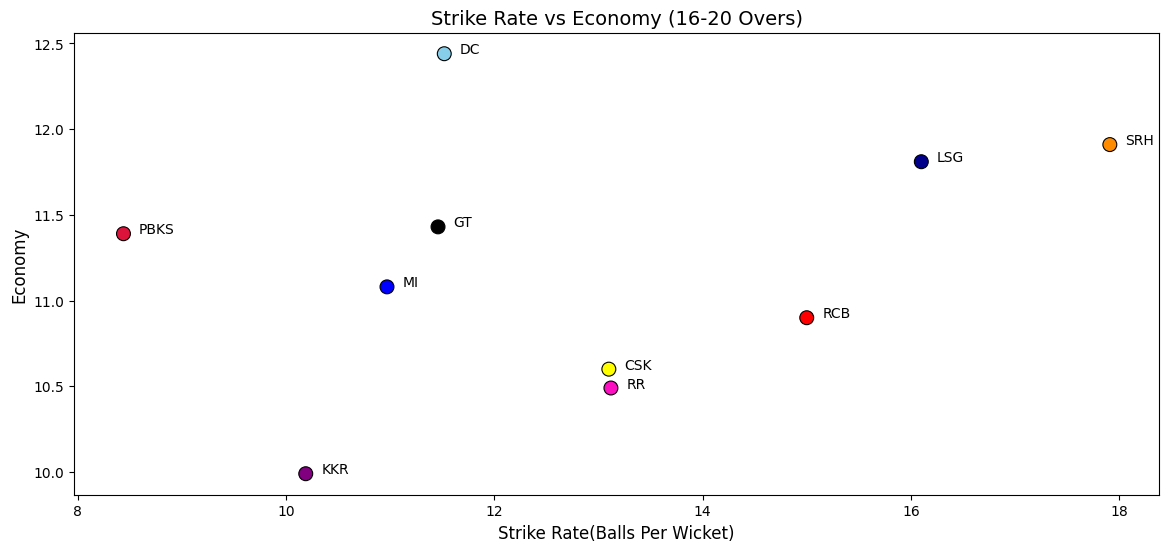

In [64]:
plt.figure(figsize=(14, 6))
scatter_plot = sb.scatterplot(
    data=deathover_team_stats,
    x='strike_rate',
    y='economy',
    hue='bowling_team',  
    palette=team_palette,
    s=100,  
    edgecolor='black',
    legend = False
)


for i in range(len(deathover_team_stats)):
    plt.text(
        deathover_team_stats['strike_rate'][i] + 0.15,  
        deathover_team_stats['economy'][i],
        deathover_team_stats['bowling_team'][i],
        fontsize=10
    )


plt.title('Strike Rate vs Economy (16-20 Overs)', fontsize=14)
plt.xlabel('Strike Rate(Balls Per Wicket)', fontsize=12)
plt.ylabel('Economy', fontsize=12)


plt.show()

# Players Analysis

# Top 10 Bowlers with best economy 

In [65]:
bowling = df.groupby(['match_id', 'bowler']).agg(
    bowler_runs=('bowler_runs', 'sum'),
    ball_count=('ball_count','sum')
).reset_index()

In [66]:
bowling = df.groupby(['bowler']).agg(
    bowler_runs=('bowler_runs', 'sum'),
    ball_count=('ball_count','sum')
).reset_index()

In [67]:
bowling.head()

,bowler,bowler_runs,ball_count
0,Abhishek Sharma,51,42
1,Akash Deep,55,21
2,Akash Madhwal,205,109
3,Alzarri Joseph,115,58
4,Anshul Kamboj,114,60


In [68]:
bowling = bowling[bowling['ball_count']>=50]

In [69]:
bowling.head()

,bowler,bowler_runs,ball_count
2,Akash Madhwal,205,109
3,Alzarri Joseph,115,58
4,Anshul Kamboj,114,60
7,Arshad Khan,114,61
8,Arshdeep Singh,505,302


In [70]:
bowling['economy'] = round(bowling['bowler_runs']/round(bowling['ball_count']/6,2),2)

In [71]:
bowling.sort_values(by='economy', ascending=True).reset_index().head(10)

,index,bowler,bowler_runs,ball_count,economy
0,17,Bumrah,336,311,6.48
1,75,Narine,368,330,6.69
2,61,Mayank Yadav,85,73,6.98
3,50,Livingstone,84,72,7.00
4,98,Santner,64,54,7.11
5,117,Theekshana,144,120,7.20
6,12,Axar,337,264,7.66
7,82,Pathirana,169,132,7.68
8,45,Krunal Pandya,255,198,7.73
9,39,Jadeja,369,282,7.85


# Top 10 Bowlers with best and worst economy (1-6 Overs)

In [72]:
powerplay_data = df[df['over'].between(0, 6)]

In [73]:
bowling = powerplay_data.groupby(['match_id', 'bowler']).agg(
    bowler_runs=('bowler_runs', 'sum'),
    ball_count=('ball_count','sum')
).reset_index()

In [74]:
bowling = powerplay_data.groupby(['bowler']).agg(
    bowler_runs=('bowler_runs', 'sum'),
    ball_count=('ball_count','sum')
).reset_index()

In [75]:
bowling = bowling[bowling['ball_count']>=50]

In [76]:
bowling['economy'] = round(bowling['bowler_runs']/round(bowling['ball_count']/6,2),2)

In [77]:
bowling.sort_values(by='economy', ascending=True).reset_index().head(10)

,index,bowler,bowler_runs,ball_count,economy
0,15,Bumrah,126,126,6.00
1,66,Rashid Khan,58,54,6.44
2,14,Boult,267,228,7.03
3,73,Sandeep Sharma,114,90,7.60
4,13,Bhuvneshwar,327,240,8.18
5,89,Tushar Deshpande,205,150,8.20
6,16,Chahar,169,122,8.31
7,54,Mustafizur,101,72,8.42
8,65,Rabada,170,120,8.50
9,85,T Natarajan,137,96,8.56


In [78]:
bowling.sort_values(by='economy', ascending=False).reset_index().head(10)

,index,bowler,bowler_runs,ball_count,economy
0,61,Naveen-ul-Haq,150,78,11.54
1,86,Thakur,106,58,10.96
2,22,Gerald Coetzee,119,66,10.82
3,25,Hardik Pandya,95,54,10.56
4,93,Warrier,104,60,10.40
5,10,Avesh Khan,134,78,10.31
6,53,Mukesh Kumar,113,66,10.27
7,82,Starc,292,174,10.07
8,28,Harshit Rana,139,84,9.93
9,58,Nandre Burger,99,60,9.90


# Top 10 Bowlers with best and worst economy (16-20 Overs)

In [79]:
deathover_data = df[df['over'].between(15, 20)]

In [80]:
bowling = deathover_data.groupby(['match_id', 'bowler']).agg(
    bowler_runs=('bowler_runs', 'sum'),
    ball_count=('ball_count','sum')
).reset_index()

In [81]:
bowling = deathover_data.groupby(['bowler']).agg(
    bowler_runs=('bowler_runs', 'sum'),
    ball_count=('ball_count','sum')
).reset_index()

In [82]:
bowling = bowling[bowling['ball_count']>=50]

In [83]:
bowling['economy'] = round(bowling['bowler_runs']/round(bowling['ball_count']/6,2),2)

In [84]:
bowling.sort_values(by='economy', ascending=True).reset_index().head(10)

,index,bowler,bowler_runs,ball_count,economy
0,15,Bumrah,109,101,6.48
1,77,Siraj,138,96,8.62
2,61,Pathirana,98,66,8.91
3,9,Avesh Khan,198,131,9.07
4,29,Harshit Rana,129,85,9.10
5,24,Gerald Coetzee,107,69,9.30
6,69,Russell,90,56,9.65
7,94,Yash Dayal,150,92,9.78
8,72,Sandeep Sharma,137,84,9.79
9,82,T Natarajan,190,116,9.83


In [85]:
bowling.sort_values(by='economy', ascending=False).reset_index().head(10)

,index,bowler,bowler_runs,ball_count,economy
0,60,Nortje,160,54,17.78
1,13,Bhuvneshwar,149,66,13.55
2,71,Sam Curran,156,72,13.00
3,49,Mohsin Khan,142,66,12.91
4,95,Yash Thakur,178,83,12.87
5,79,Starc,134,65,12.37
6,35,Khaleel Ahmed,134,66,12.18
7,6,Arshdeep Singh,198,98,12.12
8,16,Chahal,168,84,12.00
9,50,Mukesh Kumar,175,93,11.29


# Top 10 Bowlers with best and worst economy (7-15 Overs)

In [86]:
middleover_data = df[df['over'].between(7, 15)]

In [87]:
bowling = middleover_data.groupby(['match_id', 'bowler']).agg(
    bowler_runs=('bowler_runs', 'sum'),
    ball_count=('ball_count','sum')
).reset_index()

In [88]:
bowling = middleover_data.groupby(['bowler']).agg(
    bowler_runs=('bowler_runs', 'sum'),
    ball_count=('ball_count','sum')
).reset_index()

In [89]:
bowling = bowling[bowling['ball_count']>=50]

In [90]:
bowling['economy'] = round(bowling['bowler_runs']/round(bowling['ball_count']/6,2),2)

In [91]:
bowling.sort_values(by='economy', ascending=True).reset_index().head(10)

,index,bowler,bowler_runs,ball_count,economy
0,105,Theekshana,71,66,6.45
1,72,Pathirana,71,66,6.45
2,66,Narine,226,210,6.46
3,85,Sandeep Sharma,60,54,6.67
4,43,Livingstone,71,60,7.10
5,39,Krunal Pandya,150,126,7.14
6,14,Bumrah,101,84,7.21
7,19,Cummins,164,132,7.45
8,34,Jadeja,257,204,7.56
9,51,Maxwell,69,54,7.67


In [92]:
bowling.sort_values(by='economy', ascending=False).reset_index().head(10)

,index,bowler,bowler_runs,ball_count,economy
0,48,Markande,166,90,11.07
1,120,Yash Thakur,137,76,10.81
2,87,Shahbaz Ahmed,186,105,10.63
3,76,Rasikh Salam,137,78,10.54
4,22,Gerald Coetzee,115,66,10.45
5,36,Karn Sharma,217,126,10.33
6,58,Mohit Sharma,153,90,10.20
7,82,Russell,190,115,9.91
8,25,Hardik Pandya,186,114,9.79
9,110,Unadkat,182,114,9.58


# Venue Analysis

# Batting

#  Overall Run Rate

In [93]:
batting = df.groupby(['match_id','batting_team','venue']).agg(
    team_runs=('team_runs', 'sum'),
    ball_count=('ball_count','sum'),
    wickets=('wicket_count','sum')
).reset_index()

In [94]:
batting['run_rate'] = np.where(
    batting['wickets'] != 10,
    round(batting['team_runs']/round(batting['ball_count']/6,2),2),
    round(batting['team_runs'] / 20, 2)
)

In [95]:
batting['venue_city'] = batting['venue'].str.split(",").str[1].str.strip()

In [96]:
batting = batting.groupby('venue_city')['run_rate'].mean().round(2).reset_index()

In [97]:
batting = batting.sort_values(by='run_rate', ascending=False).reset_index()

In [98]:
venue_palette = {
    'Guwahati': '#fc0fc0',
    'Kolkata': 'purple',
    'Mumbai': '#0000ff',
    'Delhi': '#87ceeb',
    'Bengaluru': '#ff0000',
    'Chennai': '#ffff00',
    'Hyderabad': '#ff8c00',
    'Visakhapatnam':'#87ceeb',
    'Jaipur':'#fc0fc0',
    'Ahmedabad':'black',
    'Lucknow':'darkblue',
    'Mullanpur':'#dc143c',
    'Dharamsala':'#dc143c'}
    


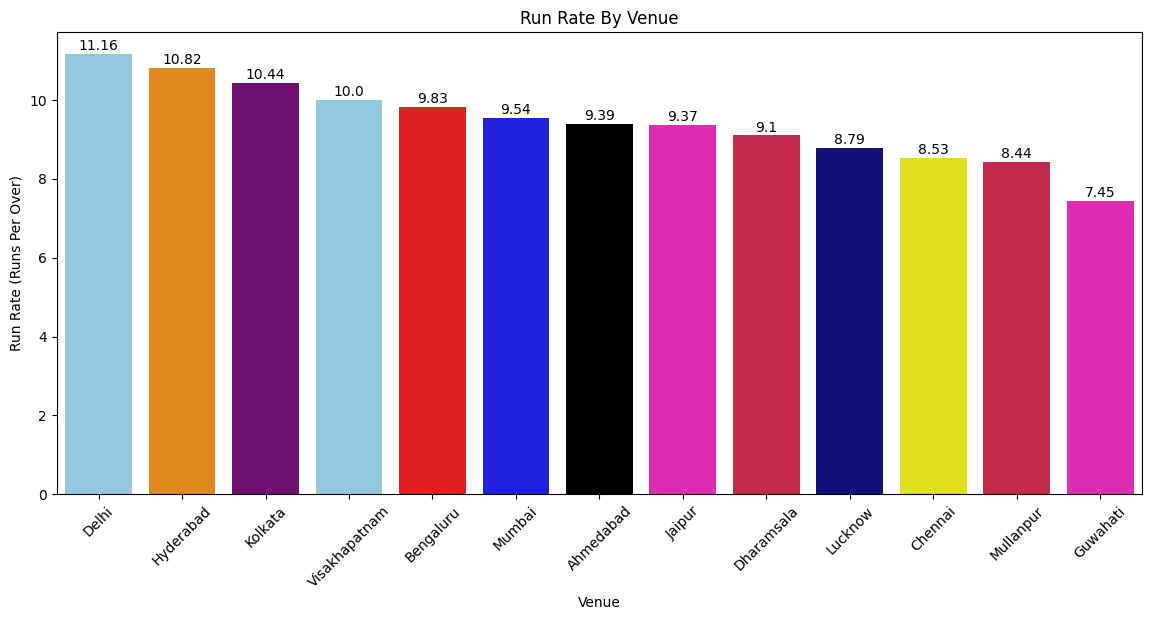

In [99]:
plt.figure(figsize=(14, 6))
sb.barplot(x='venue_city', y='run_rate', data=batting, palette=venue_palette)


plt.xlabel('Venue')
plt.ylabel('Run Rate (Runs Per Over)')
plt.title('Run Rate By Venue')
plt.xticks(rotation=45)

for index, row in batting.iterrows():
    plt.text(index, row['run_rate'] + 0.10,  
             row['run_rate'],      
             ha='center', color='black')

plt.show()

# Wickets Frequency

In [100]:
wickets = df.groupby(['venue']).agg(
    ball_count=('ball_count', 'sum'),
    wickets=('wicket_count','sum')
).reset_index()

In [101]:
wickets['strike_rate'] = round(wickets['ball_count']/wickets['wickets'],2)

In [102]:
wickets['venue_city'] = wickets['venue'].str.split(",").str[1].str.strip()

In [103]:
wickets = wickets.sort_values(by='strike_rate', ascending=True).reset_index()

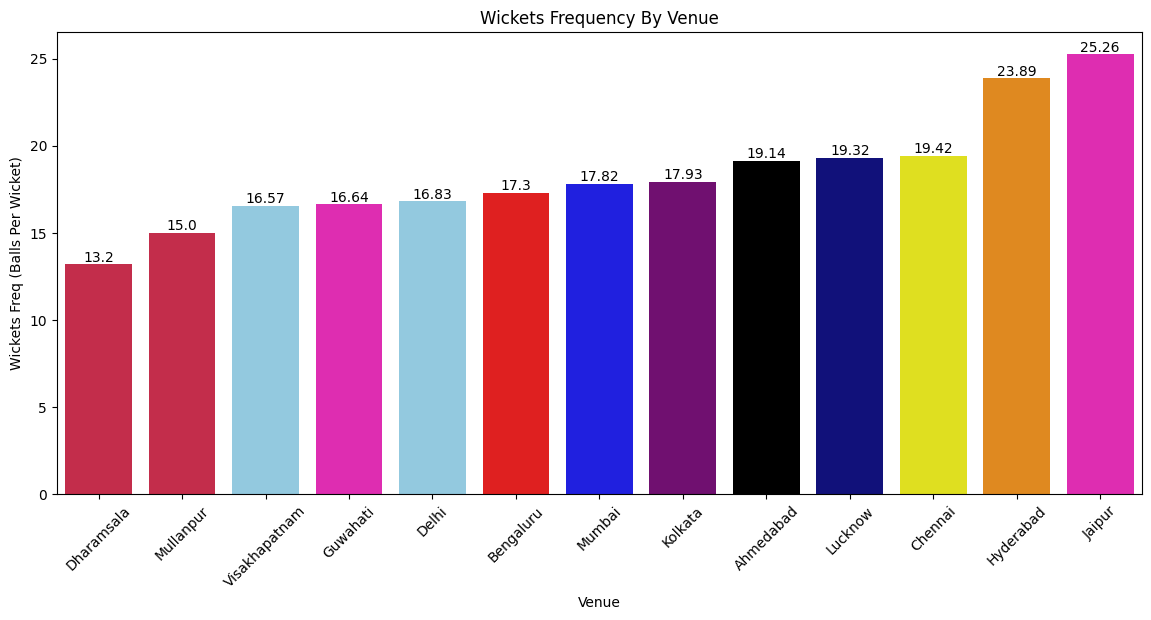

In [104]:
plt.figure(figsize=(14, 6))
sb.barplot(x='venue_city', y='strike_rate', data=wickets, palette=venue_palette)


plt.xlabel('Venue')
plt.ylabel('Wickets Freq (Balls Per Wicket)')
plt.title('Wickets Frequency By Venue')
plt.xticks(rotation=45)  

for index, row in wickets.iterrows():
    plt.text(index, row['strike_rate'] + 0.15,  
             row['strike_rate'],      
             ha='center', color='black')

plt.show()